## World Happiness Report Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-2306**

## About The World Happiness Report Project

The World Happiness Report is a significant survey that examines the global state of happiness. It was first published in 2012, followed by reports in 2013, 2015, and an update in 2016. On March 20th, the World Happiness Report for 2017 was released at the United Nations during an event commemorating International Day of Happiness. This report ranks 155 countries based on their levels of happiness. Over time, the report has gained international recognition as governments, organizations, and civil society increasingly utilize happiness indicators to inform their policy-making decisions. Experts from various fields such as economics, psychology, survey analysis, national statistics, health, and public policy contribute to the report by demonstrating how well-being measurements can effectively assess a nation's progress.For more information you can check the link to the dataset via https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv


The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries and Loading the Data ](#Import-Necessary-Libraries-and-Loading-the-Data)
2. [Exploratory Data Analysis and Data Preprocessing](#Exploratory-Data-Analysis-and-Data-Preprocessing)
3. [Data Visualization](#Data-Visualization)
4. [Spliting Data into Training and Testing Sets](#Spliting-Data-into-Training-and-Testing-Sets)
5. [The Machine Learning Models and Predictions](#The-Machine-Learning-Models-and-Predictions)

## Import Necessary Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# URL to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"

# Reading the CSV file into a DataFrame
happiness_score = pd.read_csv(url)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv") 
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Exploratory Data Analysis and Data Preprocessing

In [4]:
# Exploring the dataset
happiness_score.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


**Happiness Score Data**

The Happiness Score dataset has 6 feature columns and a target column.This features according to the Data are:Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption) and Generosity.


In [5]:
happiness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
happiness_score.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**This gives statistical information of the numerical columns.The summary of the dataset looks perfect since there is no negative/invalid values present.**

## Data Visualization

In [7]:
# Checking the Column Names
print(happiness_score.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


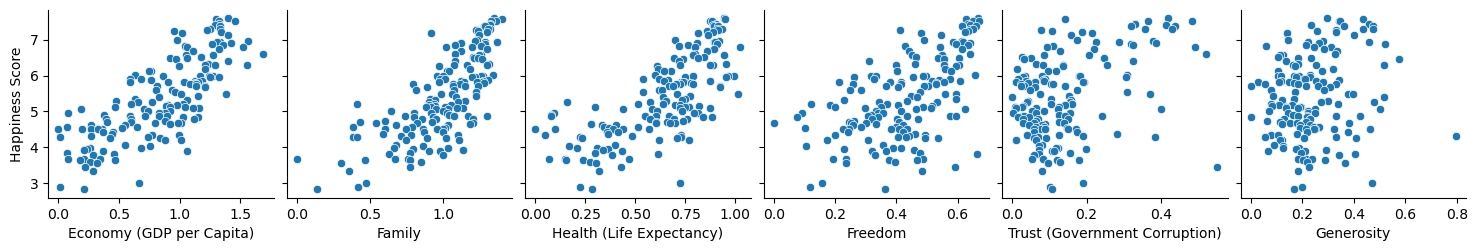

In [8]:
# Visualizing the data
sns.pairplot(happiness_score, x_vars=[ "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"], y_vars=["Happiness Score"])


In [9]:
# Creating a PairGrid object and map pairplots
pair_grid = sns.pairplot(happiness_score, 
                        x_vars=["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"], 
                        y_vars=["Happiness Score"])

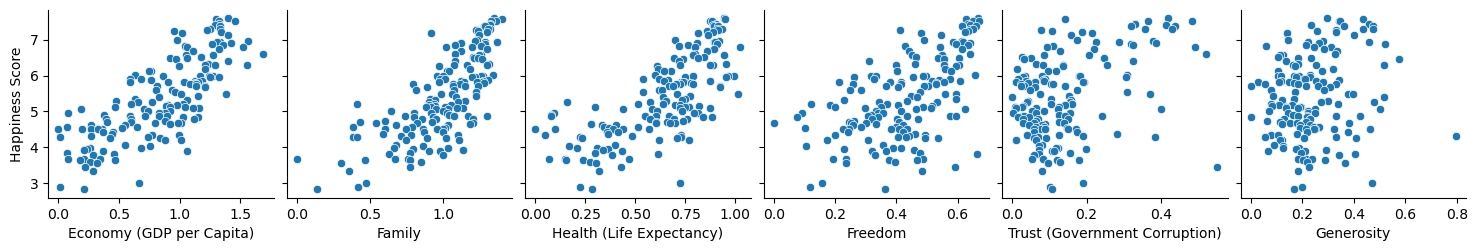

In [10]:
# Displaying the pairplot
plt.show()

## Spliting Data into Training and Testing Sets

In [11]:
X = happiness_score[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]]
y = happiness_score["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## The Machine Learning Models and Predictions


## Linear Regression Model

**Building and Training the Linear Regression Model**

In [12]:
# Initializing the model
model = LinearRegression()

In [13]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

**Evaluating The LR Model Performance**

In [14]:
# Making predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluating the LR model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.40230498538144016
Mean Squared Error: 0.24193882833563762
R-squared: 0.8294705100069292


## Random Forest Model

In [16]:
# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluating The Random Forest Model Performance**

In [18]:
# Making predictions
y_pred_rf = rf_model.predict(X_test)

In [19]:
# Evaluating the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Absolute Error: 0.4338493750000002
Random Forest Mean Squared Error: 0.27010824548125006
Random Forest R-squared: 0.8096154236105478


## Decision Tree Model

In [20]:
# Initializing the model
dt_model = DecisionTreeRegressor(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

**Evaluating the Decision Tree Model**

In [21]:
# Making predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Mean Absolute Error:", mae_dt)
print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R-squared:", r2_dt)


Decision Tree Mean Absolute Error: 0.5429375
Decision Tree Mean Squared Error: 0.55147575
Decision Tree R-squared: 0.6112948093615542


## K-Nearest Neighbors (KNN) Model

In [22]:
# Initializing the model
knn_model = KNeighborsRegressor(n_neighbors=5)  # The number of neighbors(k) can be adjusted as required

# Training the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

**Evaluating the KNN Model**

In [23]:
# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Absolute Error:", mae_knn)
print("KNN Mean Squared Error:", mse_knn)
print("KNN R-squared:", r2_knn)

KNN Mean Absolute Error: 0.43418749999999995
KNN Mean Squared Error: 0.30337978749999994
KNN R-squared: 0.7861641275504161


## Summary and Conclusion

This analysis the state of global happiness and explore how the emerging field of happiness science helps explain differences in personal and national levels of happiness using a comparison of four regression models: Linear Regression, Random Forest Regression, Decision Tree Regression, and KNN Regressor. Among these models, Linear Regression achieved the lowest Mean Absolute Error (MAE) of 0.4023, the lowest Mean Squared Error (MSE) of 0.2419, and the highest R-squared (RSQ) value of 0.8294. In comparison, Random Forest Regression had a slightly higher MAE of 0.4338, a MSE of 0.2701, and an RSQ of 0.8096. Decision Tree Regression performed the poorest among the models with a higher MAE of 0.5429, a significantly higher MSE of 0.5514, and a lower RSQ of 0.6112. KNN Regressor had an MAE of 0.4341, an MSE of 0.3033, and an RSQ of 0.7861, showing similar performance to Random Forest but slightly worse than Linear Regression.

In summary, Linear Regression demonstrated superior predictive performance compared to the other models with lower MAE and MSE values and a higher RSQ value. Random Forest Regression and KNN Regressor also performed reasonably well, while Decision Tree Regression lagged behind in predictive accuracy.